# Genetic Algorithms
## A problem-solving approach insprired by nature

In [326]:
import random as rnd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [446]:
def mutate(sol, rate=0.50, alpha=1):
    """ Mutate a solution: Introduce a genetic change. 
        (Maybe good, maybe bad!) """
    return tuple(x+rnd.uniform(-alpha,alpha) if rnd.random()<rate else x for x in sol)

In [447]:
def crossover(sol1, sol2):
    """ Combine two solutions.  Produce two new solutions! """
    split = rnd.randint(1,len(sol1)-1)
    new1 = sol1[:split] + sol2[split:]
    new2 = sol1[split:] + sol2[:split]
    return new1, new2

In [755]:
def GA(seed, maxpop, f, epochs, mutation_rate=0.5, alpha=1.0):
    """ Run a genetic algorithm simulation """
    pop = [(f(seed), seed)]  # The population is a list of (score, solution) tuples
    
    for _ in range(epochs):
        
        # mutate current solutions
        mutants = [mutate(sol, mutation_rate, alpha) for _, sol in pop]
        scored = [(f(sol), sol) for sol in mutants]
        pop = pop + scored
        
        # perform crossovers
        for _ in range(len(pop)):
            sol1, sol2 = rnd.sample(pop, k=2)
            new1, new2 = crossover(sol1[1], sol2[1])
            pop = pop + [(f(new1), new1), (f(new2), new2)]
                
        # find best solutions - kill the rest
        pop = sorted(pop)[:maxpop]  # lower scores are better
            
        
    return pop[0]
      

In [756]:

# Using evolutionary computing to find a specific point

def myfunc(sol):
    return sum([(x-3.14159)**2 for x in sol]) ** 0.5

GA((1,2,3,4,5), 10, myfunc, 100)

(0.002890934142571055,
 (3.1428828650522527,
  3.1428828650522527,
  3.1428828650522527,
  3.1428828650522527,
  3.1428828650522527))

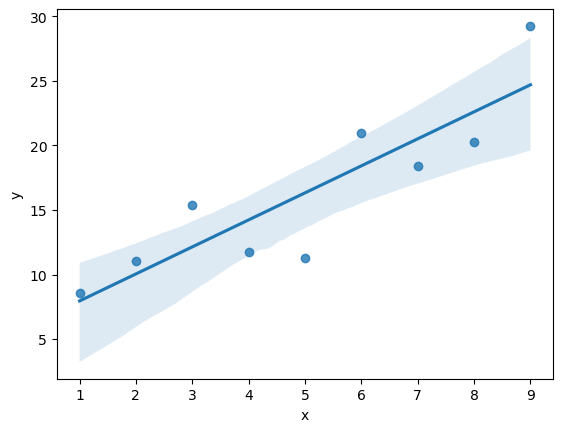

In [757]:
# Using evolutionary computing to do linear regression


xs = np.arange(1,10)
ys = [7 + 2 * x +  rnd.gauss(0, 2) for x in xs]
df = pd.DataFrame({
    'x':xs,
    'y':ys
})

sns.regplot(df, x='x', y='y')
plt.show()

In [758]:
def MSE(y, ypred):
    """ Mean Squared Error """
    diff = y - ypred
    return np.dot(diff, diff) / len(y)

In [759]:
def MAE(y, ypred):
    """ Mean Squared Error """
    return sum(abs(y-ypred)) / len(y)

In [760]:
def linear_model_error(sol):
    B0, B1 = sol
    x = df.iloc[:,0]
    y = df.iloc[:,1]
    ypred = B0 + B1 * x
    return MSE(ypred, y)

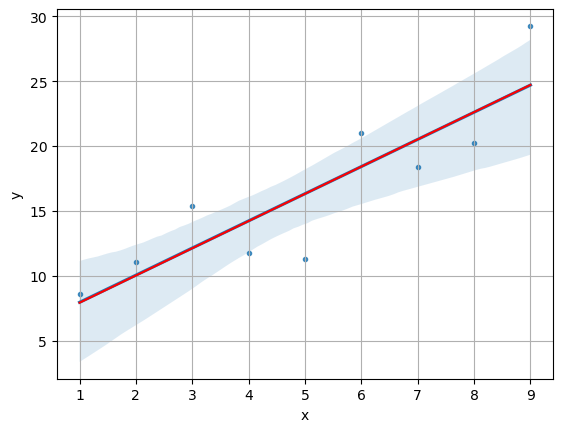

In [761]:
score, sol = GA((0,0), maxpop=5, f=linear_model_error, epochs=100, alpha=1)

sns.regplot(df, x='x', y='y', marker='.')
plt.plot(df.x, sol[0] + sol[1] * df.x, c='r')
plt.grid()
plt.show()

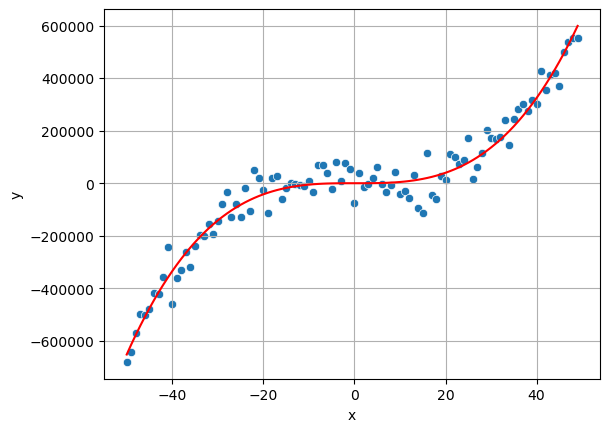

In [762]:
# Using evolutionary computing to do polynomial regression


xs = np.arange(-50,50)
ys = [7 + 2 * x - 3 * x**2 + 5 * x**3 + 10000 * rnd.gauss(0, 5) for x in xs]
df = pd.DataFrame({
    'x':xs,
    'y':ys
})

x = df.x
y = df.y

def polynomial3_model_error(sol):
    B0, B1, B2, B3 = sol
    ypred = B0 + B1 * x + B2 * x**2 + B3 * x**3
    return MSE(ypred, y)

score, sol = GA((0,0,0,0), maxpop=5, f=polynomial3_model_error, epochs=200, alpha=.5)
B0, B1, B2, B3 = sol
ypred = B0 + B1 * x + B2 * x**2 + B3 * x**3

sns.scatterplot(df, x='x', y='y')
plt.plot(x, ypred, c='r')
plt.grid()
plt.show()

In [763]:
# Best fit for sunspot data?
sun = pd.read_csv('SN_m_tot_V2.0.csv', delimiter=';', header=None)
sun = sun.iloc[:, 2:4]
sun.columns = ['year', 'spots']
sun


,year,spots
0,1749.042,96.7
1,1749.123,104.3
2,1749.204,116.7
3,1749.288,92.8
4,1749.371,141.7
...,...,...
3288,2023.042,143.6
3289,2023.122,110.9
3290,2023.204,122.6
3291,2023.286,96.4


In [764]:
def sunspot_model_error(sol):
    Y,A,T, A2, T2 = sol
    model = Y + A * np.sin(2 * np.pi * sun.year / T) + A2 * np.sin(2 * np.pi * sun.year / T2)
    return MSE(model, sun.spots)

MSE:  2861.961241086289 Y,A,T,A2,T2= (81.57588747148571, 48.825062209016885, 10.991998141502556, 35.76299861160354, 10.036262614098757)


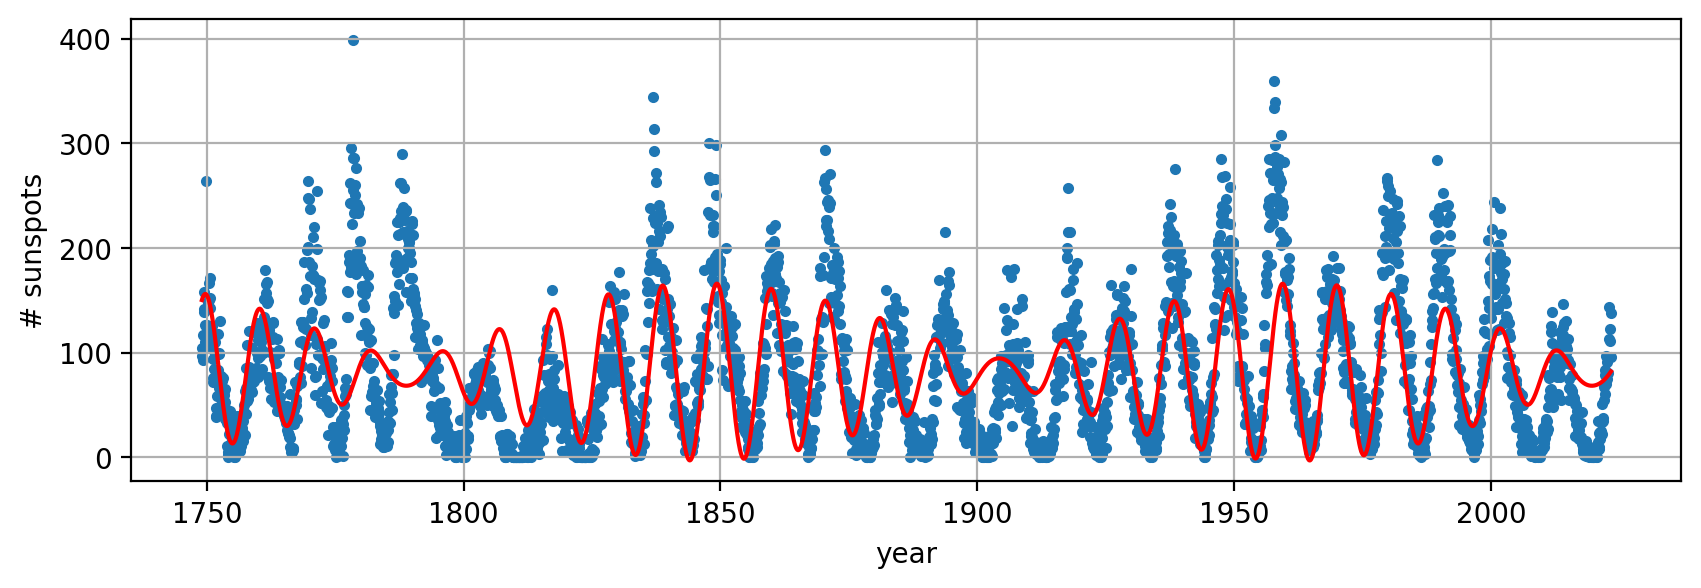

In [766]:
score, sol = GA((100,100,11, 1, 1), maxpop=5, f=sunspot_model_error, epochs=1000, alpha=1)
print("MSE: ", score, "Y,A,T,A2,T2=", sol)
Y,A,T,A2,T2 = sol
model = Y + A * np.sin(2 * np.pi * sun.year / T) + A2 * np.sin(2 * np.pi * sun.year / T2)

plt.figure(figsize=(10,3), dpi=200)
plt.scatter(sun.year, sun.spots, marker='.')
plt.plot(sun.year, model, c='r')
plt.xlabel('year')
plt.ylabel('# sunspots')
plt.grid()
plt.show()